### Master Code

In [18]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from collections import namedtuple
import numpy as np
import sys
Item = namedtuple("Item", ['index', 'value', 'weight'])

def Sort(items):
    #A function to sort a lists of lists based on value in sublist
    items.sort(key = lambda x: x[1],reverse=True)
    return items

def dynamic_programming(capacity,item_count,items):
    
    dp_table = np.zeros((capacity+1,item_count+1))
#     dp_table=[[0 for x in range(capacity+1)] for y in range(item_count+1)]

    for item in range(item_count+1):
        for cap in range(capacity+1):
            if item ==0:
                dp_table[cap,item]=0
            elif items[item-1].weight <=cap:
                dp_table[cap,item]=max(dp_table[cap,item-1],items[item-1].value+dp_table[cap-items[item-1].weight,item-1])
            else:
                dp_table[cap,item]=dp_table[cap,item-1]

    optimal_value=int(dp_table[capacity,item_count])
    rem_cap=capacity 
#     print (dp_table)
    print("Size of the DP table - ", sys.getsizeof(dp_table)/1000000, "MB")

    taken = [0]*len(items)
    for col in range(item_count,0,-1):
        if dp_table[rem_cap,col]!=dp_table[rem_cap,col-1]:
    #         print ("item %d is selected" %(col))
            taken[col-1]=1
            rem_cap-=items[col-1].weight
            if rem_cap <=0:break
    
    # prepare the solution in the specified output format
    output_data = str(optimal_value) + ' ' + str(1) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data

def greedy_value_density(capacity,item_count,items):
    item_density= []
    for i in range(0, item_count):
#         line = lines[i]
#         parts = line.split()
        item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])


    Sort(item_density)
    
#     print(item_density)

    # a trivial algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full
    value = 0
    weight = 0
    taken = [0]*len(items)
    
    for item in item_density:
        if weight + item[2] <= capacity:
            taken[item[0]] = 1
            value += item[1]
            weight += item[2]
        
    
    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data


    
def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    #Calling relavant algorithm based on input

    if item_count <400:
        return dynamic_programming(capacity,item_count,items)
    else :
        return greedy_value_density(capacity,item_count,items)

if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
        file_location = ".\\data\\ks_100_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')



Size of the DP table -  80.800936 MB
99837 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


### Greedy - Value Density 

In [65]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from collections import namedtuple
Item = namedtuple("Item", ['index', 'value', 'weight'])

def Sort(items):

    items.sort(key = lambda x: x[1],reverse=True)
    return items

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    
    #Creating a list with items value density
    item_density= []
    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        item_density.append([i-1, int(parts[0]),int(parts[1]),int(parts[0])/int(parts[1])])


    Sort(item_density)
    
#     print(item_density)

    # a trivial algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full
    value = 0
    weight = 0
    taken = [0]*len(items)
    
    for item in item_density:
        if weight + item[2] <= capacity:
            taken[item[0]] = 1
            value += item[1]
            weight += item[2]
        

#     for item in items:
#         if weight + item.weight <= capacity:
#             taken[item.index] = 1
#             value += item.value
#             weight += item.weight
    
    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data


if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
#         file_location = sys.argv[1].strip()
        file_location = ".\\data\\ks_200_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')



90001 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


### Checking input file

In [48]:
from collections import namedtuple
import numpy as np
import sys
Item = namedtuple("Item", ['index', 'value', 'weight'])

if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
#         file_location = sys.argv[1].strip()
        file_location = ".\\data\\ks_4_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
#         print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')

    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])
    
    global items
    items = []
#     global k 
    k=0

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
        
    print("Number of items - ",item_count) 
    print("Capacity of Knapsack - ", capacity)
    for i in items:
        print("item #%d, value = %d, weight = %d" %(i[0]+1,i[1],i[2]))

Number of items -  4
Capacity of Knapsack -  11
item #1, value = 8, weight = 4
item #2, value = 10, weight = 5
item #3, value = 15, weight = 8
item #4, value = 4, weight = 3


### Dynamic Programming

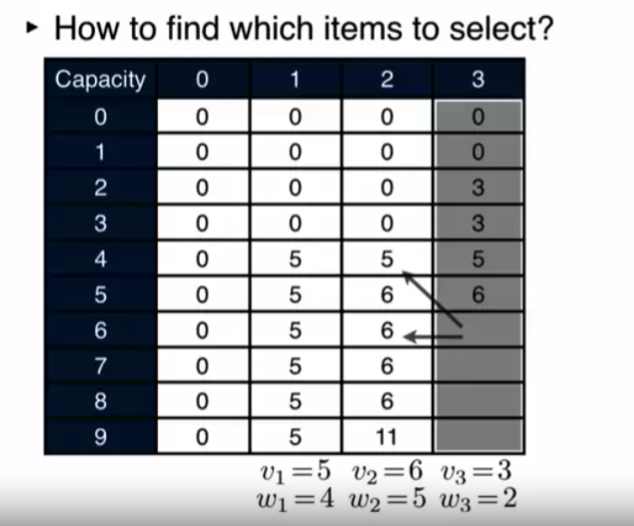

In [12]:
import numpy as np
import time

st = time.time()


def optimal(capacity, item_count):
    global k
    k+=1
    if item_count == 0:
        return 0
    elif items[item_count-1].weight <=capacity:
        return max(optimal(capacity,item_count-1),items[item_count-1].value+optimal(capacity-items[item_count-1].weight,item_count-1))
    else:
        return optimal(capacity,item_count-1)
    
print("Number of items - ",item_count) 
print("Capacity of Knapsack - ", capacity)

    
dp_table = np.zeros((capacity+1,item_count+1)) #instantiating a dynamic programming table as a np array object with relvant size


for item in range(item_count+1):
    for cap in range(capacity+1): 
        dp_table[cap,item]=optimal(cap,item)
#     print("item %d completed! Time Taken - %d" %(item,time.time()-st))

for i in items:
    print("item #%d, value = %d, weight = %d" %(i[0]+1,i[1],i[2]))
print(dp_table)

et = time.time()
elapsed_time = (et - st)*1000
print('Execution time:', elapsed_time, 'milliseconds')
print('Number of Function Calls - ',k)

Number of items -  4
Capacity of Knapsack -  11
item #1, value = 8, weight = 4
item #2, value = 10, weight = 5
item #3, value = 15, weight = 8
item #4, value = 4, weight = 3
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  8.  8.  8.  8.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 12.]
 [ 0.  8. 10. 15. 15.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 19.]]
Execution time: 1.0073184967041016 milliseconds
Number of Function Calls -  339


### Generating DP table without recursion

In [13]:
import time
import numpy as np

dp_table = np.zeros((capacity+1,item_count+1))

for item in range(item_count+1):
    for cap in range(capacity+1):
        if item ==0:
            dp_table[cap,item]=0
        elif items[item-1].weight <=cap:
            dp_table[cap,item]=max(dp_table[cap,item-1],items[item-1].value+dp_table[cap-items[item-1].weight,item-1])
        else:
            dp_table[cap,item]=dp_table[cap,item-1]

optimal_value=dp_table[capacity,item_count]
rem_cap=capacity 
print (dp_table)

taken = [0]*len(items)
for col in range(item_count,0,-1):
    if dp_table[rem_cap,col]!=dp_table[rem_cap,col-1]:
#         print ("item %d is selected" %(col))
        taken[col-1]=1
        rem_cap-=items[col-1].weight
        if rem_cap <=0:break


print (taken)
print(optimal_value)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  8.  8.  8.  8.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 12.]
 [ 0.  8. 10. 15. 15.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 19.]]
[0, 0, 1, 1]
19.0


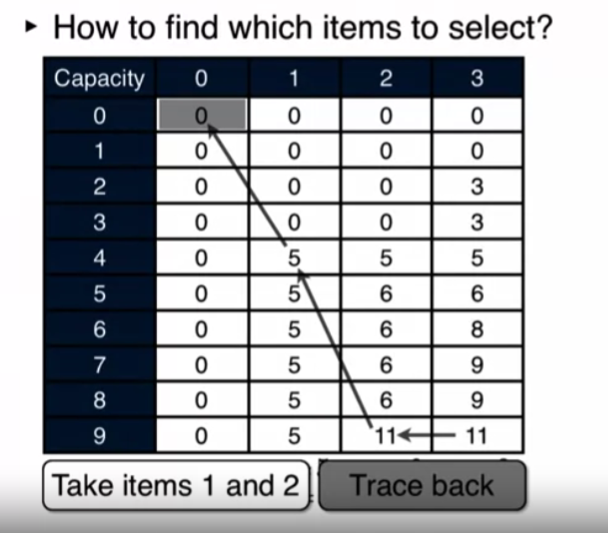

### DP without recursion in solve_it()

In [7]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from collections import namedtuple
Item = namedtuple("Item", ['index', 'value', 'weight'])

st = time.time()

def solve_it(input_data):
    # Modify this code to run your optimization algorithm
    
    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    ##New algorithm Begins
    dp_table = np.zeros((capacity+1,item_count+1))

    for item in range(item_count+1):
        for cap in range(capacity+1):
            if item ==0:
                dp_table[cap,item]=0
            elif items[item-1].weight <=cap:
                dp_table[cap,item]=max(dp_table[cap,item-1],items[item-1].value+dp_table[cap-items[item-1].weight,item-1])
            else:
                dp_table[cap,item]=dp_table[cap,item-1]

    optimal_value=int(dp_table[capacity,item_count])
    rem_cap=capacity 
    print (dp_table)

    taken = [0]*len(items)
    for col in range(item_count,0,-1):
        if dp_table[rem_cap,col]!=dp_table[rem_cap,col-1]:
    #         print ("item %d is selected" %(col))
            taken[col-1]=1
            rem_cap-=items[col-1].weight
            if rem_cap <=0:break
    
    # prepare the solution in the specified output format
    output_data = str(optimal_value) + ' ' + str(1) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data


if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
#         file_location = sys.argv[1].strip()
        file_location = ".\\data\\ks_40_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')

et = time.time()
elapsed_time = (et - st)
print('Execution time:', elapsed_time, 'seconds')

[[    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0. 90001. 90001. ... 99924. 99924. 99924.]
 [    0. 90001. 90001. ... 99924. 99924. 99924.]
 [    0. 90001. 90001. ... 99924. 99924. 99924.]]
99924 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
Execution time: 2.0982561111450195 seconds


### Why value density greedy algorithm is not optimal?

Imagine a case - <br>
Number of Items - 3
Capacity - 11

Item 1 - Value=45, Weight =5, Value Density =9 <br>
Item 2 - Value=48, Weight =8, Value Density =8 <br>
Item 3 - Value=35, Weight =3, Value Density =11.66 <br>

According to the greedy algorithm - <br>
Chosen items - 3,1 <br>
Total Value - 80 (35+45) <br>
Total Weight - 8 <br>

However, the optimal solution is 2,3 <br>
Total Value - 83 (35+48) <br>
Total Weight - 11 <br>

The greedy approach chose item 1 with higher value density first, but that left some under utilised space, if we were to take the second item which had lesser value density (inefficient), we could have had a larger total value due to the higher weight of the item, as we had some extra space anyways!

### Depth First Branch and Bound 

In [17]:
import numpy as np
import sys
from collections import deque
Item = namedtuple("Item", ['index', 'value', 'weight'])


def Sort(items):
    #A function to sort a lists of lists based on value in sublist
    items.sort(key = lambda x: x[3],reverse=True)
    return items

def objective_value(taken,items):
    
    objective=0
    for i in range(len(items)):
        objective+=(items[i].value)*int(taken[i])
        
    return objective

def best_estimate(item_density,capacity):
    best_estimate=0
    rem_cap=capacity
    for item in item_density:
        if item[2] <=rem_cap: #item[2]=weight of item
            rem_cap-=item[2]
            best_estimate+=item[1] #item[1]=value
        else:
            best_estimate+=rem_cap*item[3] #item[3]=value_density
            rem_cap=0
            break
    return best_estimate

def depth_branch_bound(capacity,item_count,items):
    
    #Creating list with value density
    item_density= []
    for i in range(0, item_count):
        item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])        
    Sort(item_density) # Sorting items based on value density
    
    taken=[0] * item_count
    starting_index=0
    starting_value=0
    current_best_objective=0
    current_best_taken=taken
    prune=0
    depth=0

    #Vertex_Summary =[index,value,capacity,best_estimate_given_decisions,taken]
    vertex_summary=(starting_index,starting_value,capacity,best_estimate(item_density,capacity),taken)
    stack=deque()
    stack.append(vertex_summary)

    start = time.time()
    while len(stack)>0:

        index,value,room,best_est,taken=stack.pop()
        
        #Pruning if optimisitic estimate is less than the best solution we have already
        if best_est<current_best_objective:
            prune+=1
            continue
        
        #end of branch
        if (index >= item_count):
            depth+=1
            continue
            
        #Avoiding the item
        new_best_estimate_ifnot_taken= value+best_estimate(copy.deepcopy(item_density[index+1:]),capacity)
        # stack.appendleft((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        stack.append((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        
        #Taking the item if there is room for it.
        cur_item_value=item_density[index][1]
        cur_item_weight=item_density[index][2]
        new_best_estimate_if_taken=best_est #will remain same
        
        if cur_item_weight<=room:
            taken[item_density[index][0]]=1
            room=room-cur_item_weight
            # stack.appendleft((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            stack.append((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            current_best_objective = max(value+cur_item_value, current_best_objective)
            if ((value+cur_item_value) == current_best_objective):
                current_best_taken = copy.deepcopy(taken)
        
    

    print ("Branches Pruned - ",prune)
    print ("Depth's reached - ",depth)
    print("BnB (depth-first) Solution found in: " + str(time.time() - start) + " seconds")
    return current_best_taken,current_best_objective
    

    
    
    
##MAIN_CODE    
file_location = ".\\data\\ks_100_0"

with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()
    
    #Parsing Input Data
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    #Calling Relevant Algorithm
    print(depth_branch_bound(capacity,item_count,items))


# initial_solution = np.zeros(())

Branches Pruned -  17465397
Depth's reached -  33896
BnB (depth-first) Solution found in: 8267.222996711731 seconds
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 99837)


### Working

In [80]:
objective_value([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],items)

99924

In [66]:
import copy
a=[3]
b=copy.deepcopy(a)
b.append(2)
a,b
best_estimate(item_density[1:],capacity)

21.25

In [47]:
def best_estimate(item_density,capacity):
    best_estimate=0
    rem_cap=capacity
    for item in item_density:
        if item[2] <=rem_cap: #item[2]=weight of item
            rem_cap-=item[2]
            best_estimate+=item[1] #item[1]=value
        else:
            best_estimate+=rem_cap*item[3] #item[3]=value_density
            rem_cap=0
            break
    return best_estimate

item_density= []
for i in range(0, item_count):
    item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])        
Sort(item_density) # Sorting items based on value density
best_estimate(item_density,capacity)

21.75

In [49]:
item_density= []
for i in range(0, item_count):
    item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])        
Sort(item_density) # Sorting items based on value density
item_density

[[0, 8, 4, 2.0],
 [1, 10, 5, 2.0],
 [2, 15, 8, 1.875],
 [3, 4, 3, 1.3333333333333333]]

In [14]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]


class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())
    
g=Graph()
for i in range(6):
    g.addVertex(i)
g.vertList
g.addEdge(0,1,5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)

for v in g:
   for w in v.getConnections():
       print("( %s , %s )" % (v.getId(), w.getId()))
        


( 0 , 1 )
( 0 , 5 )
( 1 , 2 )
( 2 , 3 )
( 3 , 4 )
( 3 , 5 )
( 4 , 0 )
( 5 , 4 )
( 5 , 2 )


In [18]:
x=Vertex(1)
x.

1

In [ ]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

x=Vertex(1)

FUCK THIS SHIT!!

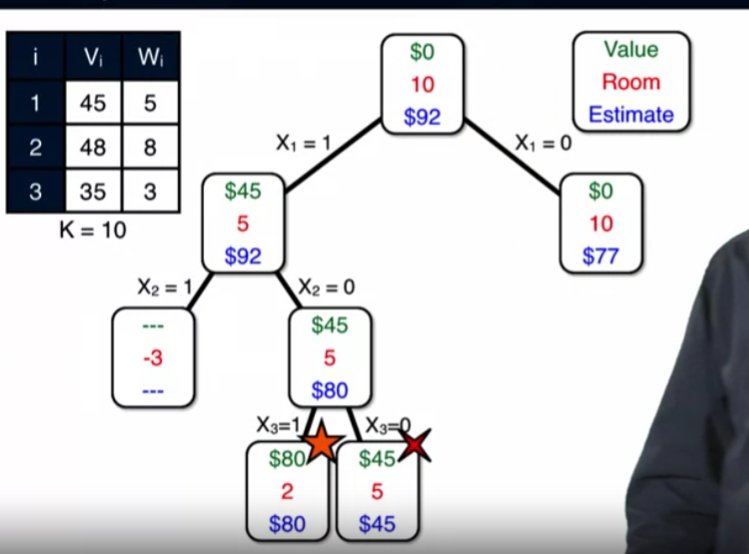

In [20]:
import sys

sys.maxsize

9223372036854775807

In [84]:
a="0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0"
b=a.split()
b
def objective_value(taken,items):
    
    objective=0
    for i in range(len(items)):
        objective+=(items[i].value)*int(taken[i])
    return objective
objective_value(b,items)

99924

### Depth First - My implementation

In [15]:
from collections import namedtuple
import numpy as np
import sys
from collections import deque
import time
import copy
Item = namedtuple("Item", ['index', 'value', 'weight'])


def Sort(items):
    #A function to sort a lists of lists based on value in sublist
    items.sort(key = lambda x: x[3],reverse=True)
    return items

def objective_value(taken,items):
    
    objective=0
    for i in range(len(items)):
        objective+=(items[i].value)*int(taken[i])
        
    return objective

def best_estimate(item_density,capacity):
    best_estimate=0
    rem_cap=capacity
    for item in item_density:
        if item[2] <=rem_cap: #item[2]=weight of item
            rem_cap-=item[2]
            best_estimate+=item[1] #item[1]=value
        else:
            best_estimate+=rem_cap*item[3] #item[3]=value_density
            rem_cap=0
            break
    return best_estimate

def depth_branch_bound(capacity,item_count,items):
    
    #Creating list with value density
    item_density= []
    for i in range(0, item_count):
        item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])        
    Sort(item_density) # Sorting items based on value density
    
    taken=[0] * item_count
    starting_index=0
    starting_value=0
    current_best_objective=0
    current_best_taken=taken
    prune=0
    depth=0

    #Vertex_Summary =[index,value,capacity,best_estimate_given_decisions,taken]
    vertex_summary=(starting_index,starting_value,capacity,best_estimate(item_density,capacity),taken)
    stack=deque()
    stack.append(vertex_summary)

    start = time.time()
    while len(stack)>0:

        index,value,room,best_est,taken=stack.pop()
        
        #Pruning if optimisitic estimate is less than the best solution we have already
        if best_est<current_best_objective:
            prune+=1
            continue
        
        #end of branch
        if (index >= item_count):
            depth+=1
            continue
            
        #Avoiding the item
        new_best_estimate_ifnot_taken= value+best_estimate(copy.deepcopy(item_density[index+1:]),capacity)
        # stack.appendleft((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        stack.append((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        
        #Taking the item if there is room for it.
        cur_item_value=item_density[index][1]
        cur_item_weight=item_density[index][2]
        new_best_estimate_if_taken=best_est #will remain same
        
        if cur_item_weight<=room:
            taken[item_density[index][0]]=1
            room=room-cur_item_weight
            # stack.appendleft((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            stack.append((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            current_best_objective = max(value+cur_item_value, current_best_objective)
            if ((value+cur_item_value) == current_best_objective):
                current_best_taken = copy.deepcopy(taken)
        
    

    print ("Branches Pruned - ",prune)
    print ("Depth's reached - ",depth)
    print("BnB (depth-first) Solution found in: " + str(time.time() - start) + " seconds")
    return current_best_taken,current_best_objective
    

    
    
    
##MAIN_CODE    
file_location = ".\\data\\ks_40_0"

with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()
    
    #Parsing Input Data
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    #Calling Relevant Algorithm
    print(depth_branch_bound(capacity,item_count,items))


# initial_solution = np.zeros(())

Branches Pruned -  147328
Depth's reached -  2084
BnB (depth-first) Solution found in: 113.13733100891113 seconds
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 99924)
